In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel(r'D:\LOR\ML\Data_Train.xlsx')
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#extract day,month,year from "Date_of_Journey" feature

In [10]:
def change_into_DateTime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
for features in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_DateTime(features)

C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\3577260254.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data[col]=pd.to_datetime(train_data[col])


In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Date_of_Journey'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]>

In [16]:

train_data['Date_of_Journey'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]>

In [17]:
## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [18]:
train_data['Journey_Day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month
train_data['Journey_year']=train_data['Date_of_Journey'].dt.year

In [19]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-15 05:50:00,2023-01-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-01-15 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-01-15 18:05:00,2023-01-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019


In [20]:
# lets Featurize 'Departure_Time' !

In [21]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1, inplace=True)
    return df.head(3)

In [22]:
extract_hour(train_data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [23]:
# lets Featurize 'Arrival_Time' !

In [24]:
extract_hour(train_data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [25]:
## lets analyse when will most of the flights will take-off

In [26]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return ('early morning')
    elif (x>8) and (x<=12):
        return('Morning')
    elif (x>12) and (x<=16):
        return('noon')
    elif(x>16) and(x<=19):
        return('evening')
    elif(x>19) and(x<=24):
        return('night')
    else:
        return('late night')

<AxesSubplot: >

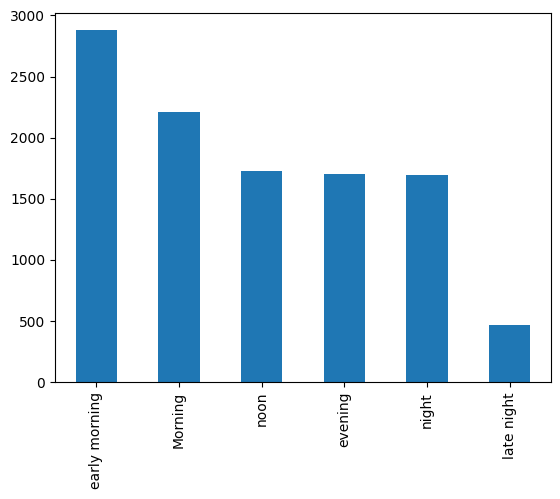

In [27]:
train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [28]:
## use Cufflinks & plotly to make your visuals more interactive !

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [30]:
cf.go_offline()

In [31]:
train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [32]:
## Pre-process Duration Feature & extract meaningful features 

In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x= x +' 0m'
    return x

In [34]:
train_data['Duration']=train_data['Duration'].apply(preprocess_duration)
train_data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [35]:
train_data['Duration_hours']=train_data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [36]:
train_data['Duration_mins']=train_data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [37]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [38]:
## Lets Analyse whether Duration impacts on Price or not ?

In [39]:
train_data['Duration_total_mins']=train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [40]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


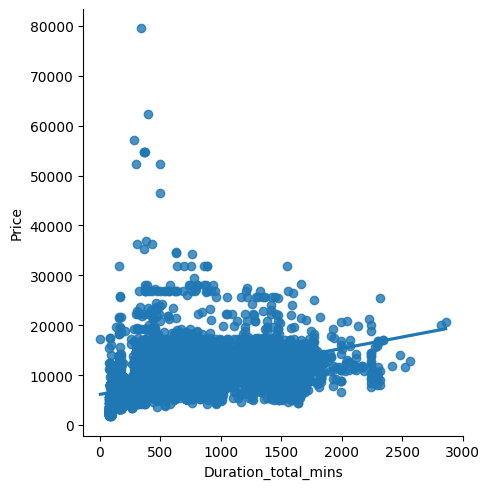

In [41]:
sns.lmplot(x='Duration_total_mins',y='Price',data=train_data)


In [42]:
## which city has maximum final destination of flights ?

<AxesSubplot: ylabel='Destination'>

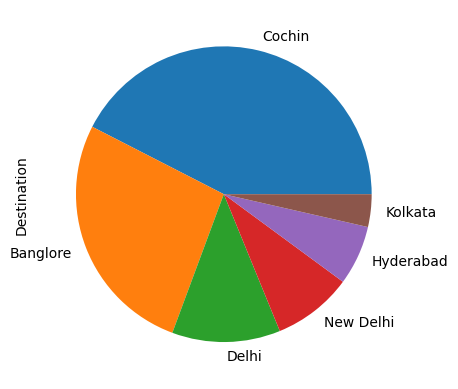

In [43]:
train_data['Destination'].value_counts().plot(kind='pie')

In [44]:
#Problem Statement-->> on which route Jet Airways is extremely used???

<AxesSubplot: xlabel='Route'>

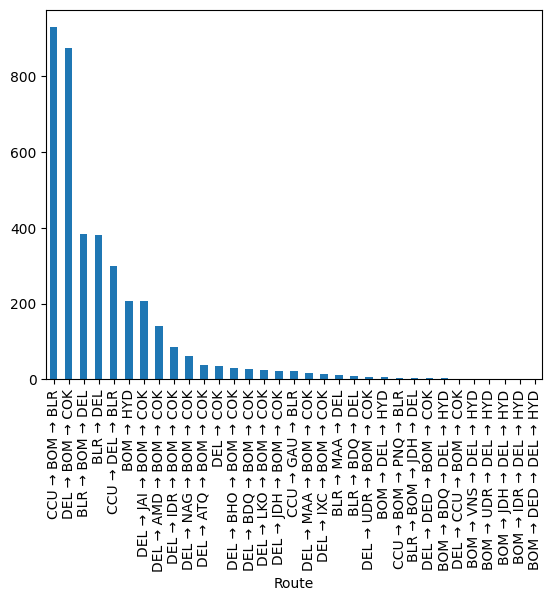

In [45]:
train_data[train_data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False).plot(kind='bar')

In [46]:
#Airline vs price analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

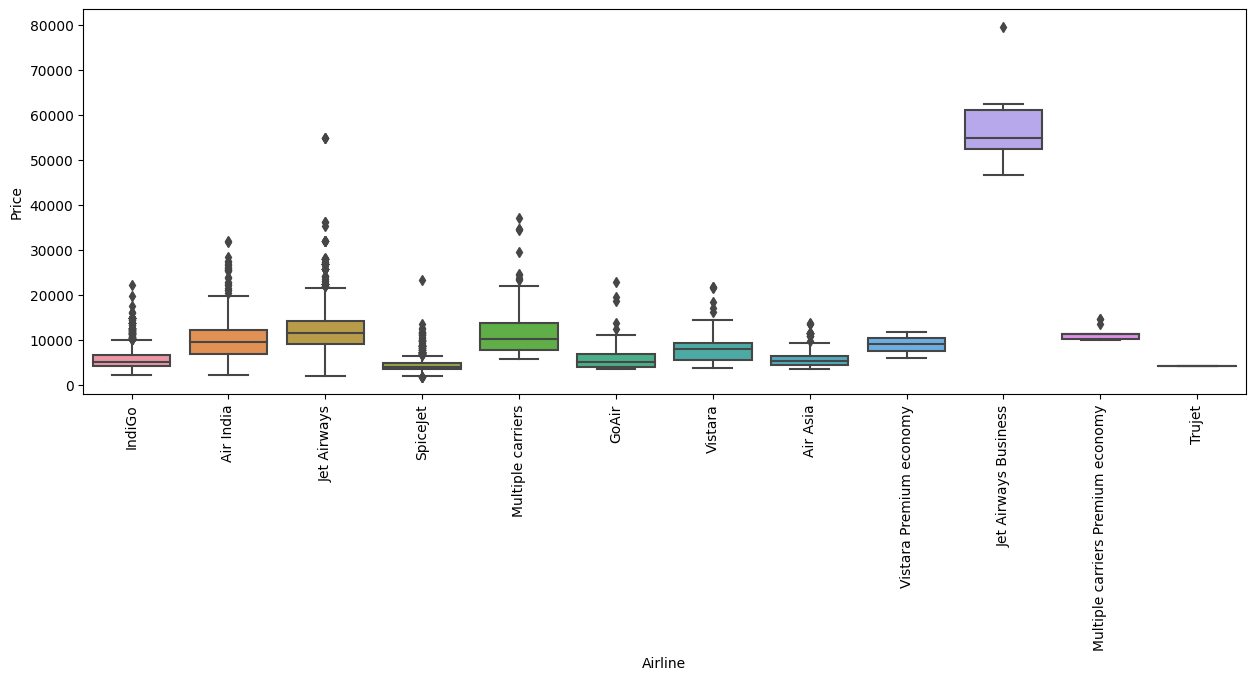

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

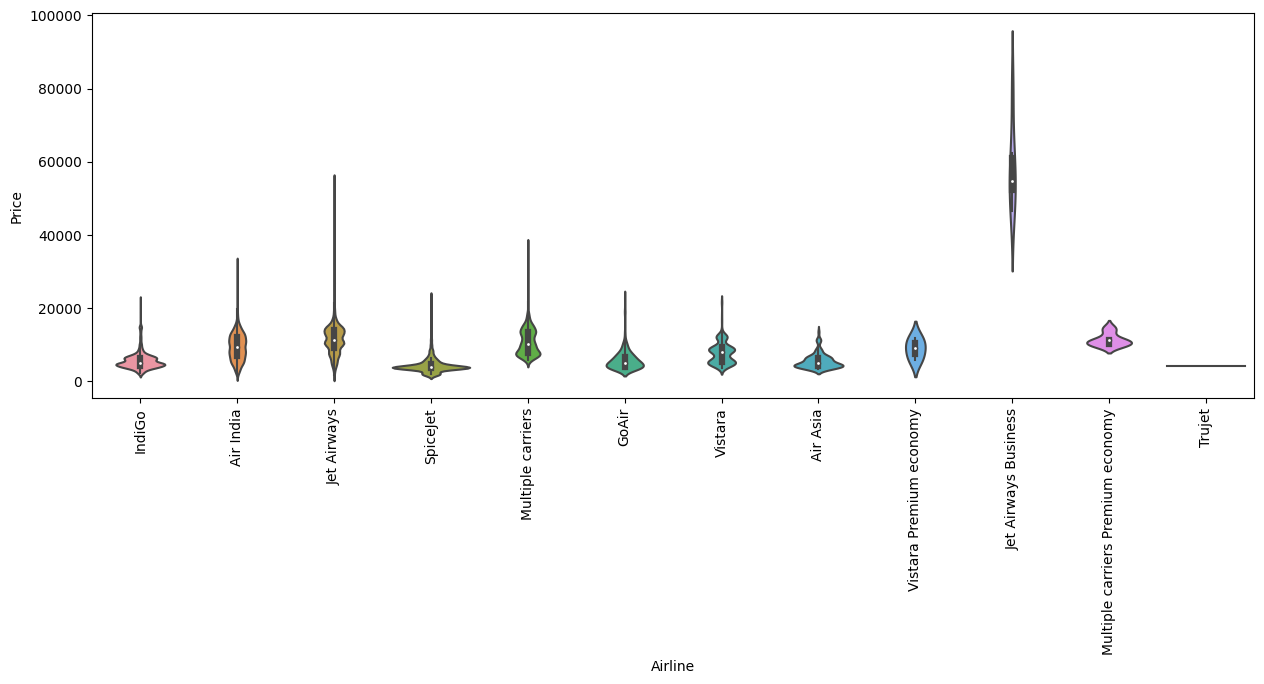

In [48]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=train_data)
plt.xticks(rotation='vertical')

In [49]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


#Onehot angorithm 

In [50]:
np.round(train_data['Additional_Info'].value_counts()/len(train_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [51]:
train_data.drop(columns=['Additional_Info','Route','Duration_total_mins','Journey_year'],axis=1,inplace=True)

In [52]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0


In [53]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']

In [54]:
num_col=[col for col in train_data.columns if train_data[col].dtype!='object']

In [55]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [56]:
train_data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [57]:
for category in train_data['Source'].unique():
    train_data['Source_'+category]=train_data['Source'].apply(lambda x:1 if x== category else 0)

In [58]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


##target guided encoding
##feature engineering airline, destination,total stops object into num value

In [59]:
airlines=train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [60]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [61]:
dict1= {key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [62]:
train_data['Airline']=train_data['Airline'].map(dict1)
train_data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [63]:
train_data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [64]:
train_data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [65]:
dest=train_data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [66]:
dict2= {key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [67]:
train_data['Destination']=train_data['Destination'].map(dict2)
train_data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [68]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [69]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [70]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
train_data['Total_Stops']=train_data['Total_Stops'].map(stops)

In [71]:
train_data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [72]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


#outilers
#outliers detection and dealing with them

In [73]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\803461781.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\803461781.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




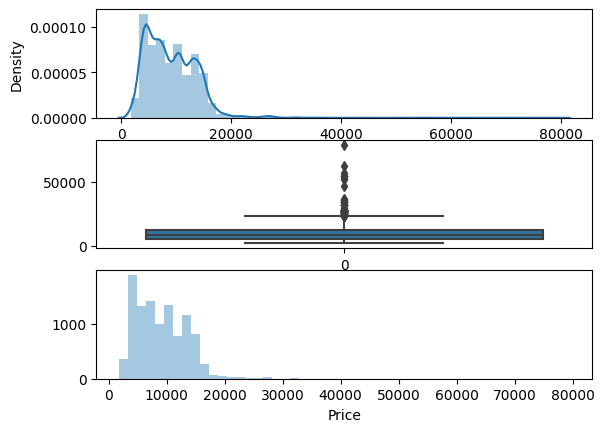

In [74]:
plot(train_data,'Price')

In [75]:
train_data['Price']=np.where(train_data['Price']>=35000,train_data['Price'].median(),train_data['Price'])

C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\803461781.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\803461781.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




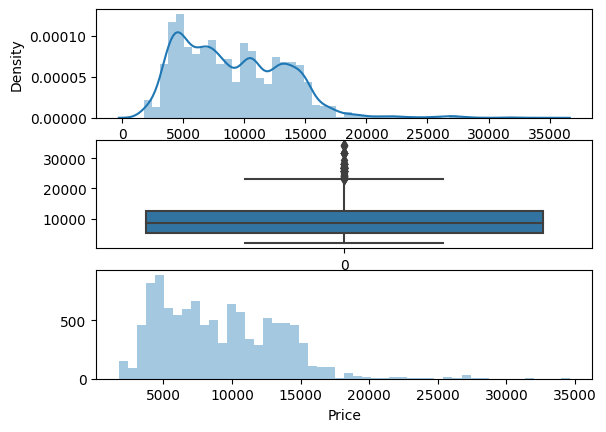

In [76]:
plot(train_data,'Price')

In [77]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,2019-09-06,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0


#feature selection

In [78]:
train_data.drop(columns=['Source','Duration','Date_of_Journey'],axis=1,inplace=True)

In [79]:
train_data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0


In [80]:
train_data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_Day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [81]:
from sklearn.feature_selection import mutual_info_regression

In [82]:
X=train_data.drop(['Price'],axis=1)

In [83]:
y=train_data['Price']

In [84]:
mutual_info_regression(X,y)

array([0.9764936 , 1.0016129 , 0.79635407, 0.20866373, 0.24991256,
       0.34484772, 0.2637704 , 0.400574  , 0.35201369, 0.47137978,
       0.33791241, 0.39010589, 0.45173124, 0.53538509, 0.14531099,
       0.19532133])

##mutual info regression measures the dependency between the variables
here price is dependent and others are independent.

In [85]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['Importance']

In [86]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,1.001623
Airline,0.969188
Total_Stops,0.787372
Source_Delhi,0.520085
Duration_hours,0.463546
Source_Kolkata,0.459119
Arrival_Time_hour,0.400543
Source_Banglore,0.388149
Duration_mins,0.358563
Arrival_Time_minute,0.340679


#building ML model random forest
#collection of decision tree
##based on entropy and informatioo gain/ Gini index or impurity level
entropy or impurity = -Pilog2Pi where i is no of classes in particular feature
IG = based on entropy, which featute is going to gain highest gain (1-sumof(Sn/S*Ei)) ;
S= total datapoints in feature; 
Sn= out of total datapoints, number of datapoints in other class
Ei=entropy of i features
feature with Highest IG will be parent node

#Gini index= 1-sigma of i=1 to c * Pi^2
feature with lowest gini index is parent node

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
ml_Model=RandomForestRegressor()

In [94]:
model=ml_Model.fit(X_train,y_train)

In [95]:
Y_Predict=model.predict(X_test)
Y_Predict

array([16735.29,  6519.01,  8839.7 , ...,  3520.5 ,  6535.01,  7027.99])

In [99]:
Y_Predict.shape

(2671,)

In [100]:
len(X_test)

2671

In [101]:
print('Training_score: {}'.format(model.score(X_train,y_train)))

Training_score: 0.9513653333387446


In [102]:
print('Test_score: {}'.format(model.score(X_test,y_test)))

Test_score: 0.8064448769017996


In [103]:
import pickle

In [104]:
file=open(r'D:\LOR\ML\RF_model.pkl','wb')

In [105]:
pickle.dump(model,file)

In [106]:
model=open(r'D:\LOR\ML\RF_model.pkl','rb')

In [107]:
forest=pickle.load(model)

In [108]:
forest.predict(X_test)

array([16735.29,  6519.01,  8839.7 , ...,  3520.5 ,  6535.01,  7027.99])

#evaluation matrix

In [109]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [110]:
mape(y_test,forest.predict(X_test))

13.310089147458463

#automate ML pipeline

In [111]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9515428379932541
Predictions are : [16657.37  6464.97  8829.95 ...  3523.69  6185.02  6829.21]


r2_score: 0.8073457434901956
MSE :  3750515.93957396
MAE :  1185.4451674689344
RMSE :  1936.6248835471365
MAPE :  13.276676581693966


C:\Users\Rishav Sah\AppData\Local\Temp\ipykernel_13648\3399414806.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




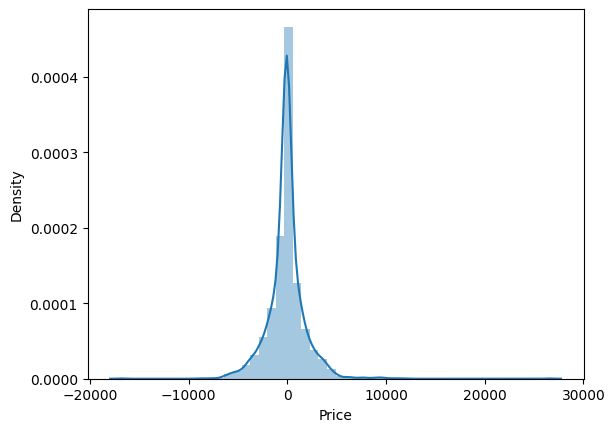

In [112]:
predict(RandomForestRegressor())